In [37]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score


# Veri okuma ve işleme fonksiyonları
def getdata(path):
    data = pd.read_csv(path)
    data['PROFILEDATE'] = pd.to_datetime(data['PROFILEDATE'].astype('str'), format ='%Y%m%d%H%M%S')
    return data[['POINTSERNO', 'PROFILEDATE', 'IMPORTNETTING']].reset_index(drop=True)

def getdata_e(path):
    data = pd.read_csv(path)
    data['PROFILEDATE'] = pd.to_datetime(data['PROFILEDATE'].astype('str'), format ='%Y%m%d%H%M%S')
    return data[['POINTSERNO', 'PROFILEDATE', 'IMPORTESTIMATED']].reset_index(drop=True)


In [2]:
# Veriyi okuma
tic_ag = getdata(r'C:\Users\ASUS\Ticarethane_AG\faz2_tic_ag.csv')
tic_ag_e = getdata_e(r'C:\Users\ASUS\Ticarethane_AG\faz2_tic_ag.csv')

In [3]:
def create_pivot_table(dataframe):
    pivot_table = dataframe.pivot_table(
        values='IMPORTNETTING',  
        index='POINTSERNO',     
        columns='PROFILEDATE',    
        aggfunc='sum',
        fill_value=np.nan           
    )

    rows_to_keep = pivot_table.sum(axis=1) != 0

    # Apply the filter to the pivot_table to drop rows with a sum of 0
    filtered_table = pivot_table[rows_to_keep]
    filtered_table.columns = pd.to_datetime(filtered_table.columns)
    selected_dates = filtered_table.loc[:, '2023-12-01':'2024-01-31']
    selected_dates = selected_dates.dropna(how='any')
        
    if (selected_dates.isna().sum().sum()) == 0:
        print('There is no nan values and we can continue to the next step')
    else:
        print('There are nan values in the dataset, please check the data')
    return(selected_dates)



r_ = create_pivot_table(tic_ag)

melt_df = r_.reset_index().melt(id_vars='POINTSERNO', var_name='Date', value_name='Value')
melt_df.sort_values('Date', inplace=True)

df_pivoted = melt_df.pivot(index='Date', columns='POINTSERNO', values='Value')

checkpoint1 = df_pivoted.isna().sum().sum()

assert checkpoint1 == 0 , f'df_pivot has NaN'

df_pivoted = df_pivoted.loc[:, df_pivoted.sum(axis=0) != 0]

unique_columns = df_pivoted.apply(lambda x: x.nunique() == 1)

columns_to_drop = unique_columns[unique_columns].index.tolist()

# Drop these columns from the DataFrame
df_main= df_pivoted.drop(columns=columns_to_drop)# df_main benim ana datasetim.. Aralık ve Ocağı verip şubatı tahmin ettireceğim

There is no nan values and we can continue to the next step


Burada temel amaç Aralık ve Ocak ayındakilerle Şubat ayında olanların kesişimini almaktır .. Aralık + Ocak'ta olup Şubatta gitmişse Predictiona gerek yok !! 

In [4]:
df_twomonths= df_main.copy()

In [5]:
def create_pivot_table(dataframe):
    pivot_table = dataframe.pivot_table(
        values='IMPORTNETTING',  
        index='POINTSERNO',     
        columns='PROFILEDATE',    
        aggfunc='sum',
        fill_value=np.nan           
    )

    rows_to_keep = pivot_table.sum(axis=1) != 0

    # Apply the filter to the pivot_table to drop rows with a sum of 0
    filtered_table = pivot_table[rows_to_keep]
    filtered_table.columns = pd.to_datetime(filtered_table.columns)
    selected_dates = filtered_table.loc[:, '2024-02-01':'2024-02-29']
    selected_dates = selected_dates.dropna(how='any')
        
    if (selected_dates.isna().sum().sum()) == 0:
        print('There is no nan values and we can continue to the next step')
    else:
        print('There are nan values in the dataset, please check the data')
    return(selected_dates)



r_ = create_pivot_table(tic_ag)

melt_df = r_.reset_index().melt(id_vars='POINTSERNO', var_name='Date', value_name='Value')
melt_df.sort_values('Date', inplace=True)

df_pivoted = melt_df.pivot(index='Date', columns='POINTSERNO', values='Value')

checkpoint1 = df_pivoted.isna().sum().sum()

assert checkpoint1 == 0 , f'df_pivot has NaN'

df_pivoted = df_pivoted.loc[:, df_pivoted.sum(axis=0) != 0]

unique_columns = df_pivoted.apply(lambda x: x.nunique() == 1)

columns_to_drop = unique_columns[unique_columns].index.tolist()

# Drop these columns from the DataFrame
df_justfeb= df_pivoted.drop(columns=columns_to_drop)

There is no nan values and we can continue to the next step


In [6]:
common_columns = df_twomonths.columns.intersection(df_justfeb.columns)
common_columns

Index([  5318,   5436,   5441,   5586,   5682,   5684,   5685,   5968,   6004,
         6027,
       ...
       277840, 299331, 319240, 320016, 320345, 320437, 320650, 320876, 342972,
       343618],
      dtype='int64', name='POINTSERNO', length=218)

In [7]:
df_main = df_main[common_columns]
df_main

POINTSERNO,5318,5436,5441,5586,5682,5684,5685,5968,6004,6027,...,277840,299331,319240,320016,320345,320437,320650,320876,342972,343618
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:00,0.1112,0.04044,0.0886,0.09904,0.24108,0.01920,0.2204,0.01350,0.00032,0.12396,...,0.012105,0.011486,0.008736,0.02875,0.003732,0.000024,0.003683,0.007020,0.00453,0.05910
2023-12-01 01:00:00,0.0808,0.03936,0.0908,0.10416,0.23916,0.01864,0.2132,0.01400,0.00032,0.12282,...,0.011076,0.007214,0.008356,0.00030,0.004967,0.000024,0.003704,0.006720,0.00573,0.05035
2023-12-01 02:00:00,0.0720,0.04104,0.0910,0.09568,0.24156,0.01976,0.2296,0.01400,0.00036,0.12492,...,0.010524,0.007160,0.007906,0.04775,0.004848,0.000025,0.003568,0.008460,0.00429,0.05005
2023-12-01 03:00:00,0.0688,0.04140,0.1044,0.10768,0.24300,0.01952,0.2168,0.01375,0.00044,0.12336,...,0.012390,0.007184,0.008642,0.00025,0.004978,0.000025,0.006729,0.009420,0.00576,0.05820
2023-12-01 04:00:00,0.0728,0.03888,0.1070,0.09744,0.24528,0.01680,0.2162,0.01400,0.00368,0.12390,...,0.010244,0.006937,0.008450,0.03240,0.003667,0.000024,0.012086,0.008040,0.00429,0.05450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31 19:00:00,0.1120,0.04368,0.1006,0.09040,0.24648,0.03968,0.2274,0.05550,0.00048,0.12402,...,0.017893,0.023648,0.021452,0.03105,0.010966,0.003204,0.005149,0.007318,0.00276,0.03160
2024-01-31 20:00:00,0.1024,0.04380,0.0998,0.08480,0.24768,0.03192,0.2298,0.04275,0.00200,0.12606,...,0.016168,0.024883,0.018387,0.02765,0.008624,0.003153,0.005103,0.007198,0.00234,0.07175
2024-01-31 21:00:00,0.0952,0.03624,0.0992,0.09408,0.24888,0.02464,0.2316,0.03725,0.00216,0.12840,...,0.017596,0.024865,0.011260,0.02335,0.008147,0.003189,0.004889,0.008098,0.00213,0.07215


In [8]:
def get_training_sequences(y, n_lookback):
 
   
 
    X = np.zeros((y.shape[0], n_lookback, y.shape[1]))
    Y = np.zeros((y.shape[0], y.shape[1]))
 
    for i in range(n_lookback, y.shape[0]):
 
        X[i, :, :] = y[i - n_lookback: i, :]
        Y[i, :] = y[i, :]
 
    X = X[n_lookback:, :, :]
    Y = Y[n_lookback:, :]
    
    # Remove Nan 
    isnan_mask = ~np.isnan(Y).any(axis=1)
    X = X[isnan_mask]
    Y = Y[isnan_mask]
 
    return X, Y

In [9]:
def train_model_with_lookback(df, lookback):
    pred_df = pd.DataFrame()

    for column in df.columns:
        print(f"Processing column: {column}")

        data = df[[column]].values

        # X Y train
        X, y = get_training_sequences(data, lookback)
        X_train = X.reshape(X.shape[0], -1) 
        y_train = y.ravel() 

        # RF eğit
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Son lookback 
        last_sequence = X[-1].reshape(1, -1)  # Eğitim verisinin son dizisi

        # 24 saatlik prediction
        y_pred = []
        for _ in range(24):
            next_pred = rf_model.predict(last_sequence)[0]
            y_pred.append(next_pred)

            # Prediction'ı ekle 
            last_sequence = np.append(last_sequence[:, 1:], [[next_pred]], axis=1)

        # index hazırla
        start_date = df.index[-1] + pd.Timedelta(hours=1)
        hours = pd.date_range(start=start_date, periods=24, freq='h')
        pred = pd.DataFrame(y_pred, index=hours, columns=[column])

        #tahminleri ekle 
        pred_df = pd.concat([pred_df, pred], axis=1)

    return pred_df

In [10]:
def create_pivot_table_for_compare(dataframe,date):
    pivot_table = dataframe.pivot_table(
        values='IMPORTNETTING',  
        index='POINTSERNO',     
        columns='PROFILEDATE',    
        aggfunc='sum',
        fill_value=np.nan           
    )

    rows_to_keep = pivot_table.sum(axis=1) != 0

    # Apply the filter to the pivot_table to drop rows with a sum of 0
    filtered_table = pivot_table[rows_to_keep]
    filtered_table.columns = pd.to_datetime(filtered_table.columns)
    selected_dates = filtered_table.loc[:, date:date]
    selected_dates = selected_dates.dropna(how='any')
        
    
    return(selected_dates)


In [11]:
def comparedf (dataframe,date):
    r_ = create_pivot_table_for_compare(dataframe,date)

    melt_df = r_.reset_index().melt(id_vars='POINTSERNO', var_name='Date', value_name='Value')
    melt_df.sort_values('Date', inplace=True)

    df_pivoted = melt_df.pivot(index='Date', columns='POINTSERNO', values='Value')

    checkpoint1 = df_pivoted.isna().sum().sum()

    assert checkpoint1 == 0 , f'df_pivot has NaN'

    #df_pivoted = df_pivoted.loc[:, df_pivoted.sum(axis=0) != 0]

    # unique_columns = df_pivoted.apply(lambda x: x.nunique() == 1)

    # columns_to_drop = unique_columns[unique_columns].index.tolist()

    # # Drop these columns from the DataFrame
    # df_act= df_pivoted.drop(columns=columns_to_drop)# df_main benim ana datasetim.. Aralık ve Ocağı verip şubatı tahmin ettireceğim
    df_act = df_pivoted
    return df_act

In [12]:
df_stock = df_main.copy()

In [14]:
from tqdm import tqdm 

In [15]:

date_try_exe = []

In [16]:

# Initialize an empty DataFrame to store all predictions
all_pred = pd.DataFrame()

# Loop through each column in df_stock
for column in tqdm(df_stock.columns):
    # Create a working DataFrame for the current column
    workFrame_col = df_stock[[column]]
    
    # Initialize an empty DataFrame to store predictions for the current column
    column_pred = pd.DataFrame()
    
    # Run a 29-iteration loop for the current column
    for i in range(29):
        # Train the model and generate predictions
        predict = train_model_with_lookback(workFrame_col, 168)
        
        # If it's the first iteration, initialize column_pred with the predictions
        if i == 0:
            column_pred = predict.copy()
        else:
            # For subsequent iterations, append the new predictions to column_pred
            column_pred = pd.concat([column_pred, predict], ignore_index=False)
        
        # Get the actual data for the last prediction date
        compare_date = predict.index[-1].strftime('%Y-%m-%d')
        
        
        try:
            actual_data_for_day = comparedf(tic_ag, compare_date)[[column]]
            
            workFrame_col = pd.concat([workFrame_col, actual_data_for_day], ignore_index=False)
        
        except KeyError as e:
            print(f"KeyError: {e} - Column: {column} on Date: {compare_date}")
            date_try_exe.append(compare_date)
            
            actual_data_for_day = predict.copy()
            workFrame_col = pd.concat([workFrame_col, actual_data_for_day], ignore_index=False)
        
        except Exception as e:
            print(f"An error occurred: {e} - Column: {column} on Date: {compare_date}")
            date_try_exe.append(compare_date)
            
            actual_data_for_day = predict.copy()
            workFrame_col = pd.concat([workFrame_col, actual_data_for_day], ignore_index=False)
        
        
        
    
    # After completing the iterations for the current column, add the predictions to all_pred
    all_pred = pd.concat([all_pred, column_pred], axis=1)

# Ensure all_pred has the correct column names
all_pred.columns = df_stock.columns

  0%|          | 0/218 [00:00<?, ?it/s]

Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318
Processing column: 5318


  0%|          | 1/218 [11:30<41:38:27, 690.82s/it]

Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436
Processing column: 5436


  1%|          | 2/218 [24:07<43:46:16, 729.52s/it]

Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441
Processing column: 5441


  1%|▏         | 3/218 [35:56<43:00:16, 720.08s/it]

Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586
Processing column: 5586


  2%|▏         | 4/218 [46:54<41:20:57, 695.60s/it]

Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682
Processing column: 5682


  2%|▏         | 5/218 [59:36<42:34:40, 719.63s/it]

Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684
Processing column: 5684


  3%|▎         | 6/218 [1:13:04<44:09:12, 749.78s/it]

Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685
Processing column: 5685


  3%|▎         | 7/218 [1:24:34<42:47:44, 730.16s/it]

Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968
Processing column: 5968


  4%|▎         | 8/218 [1:36:10<41:56:56, 719.12s/it]

Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004
Processing column: 6004


  4%|▍         | 9/218 [1:47:05<40:35:22, 699.15s/it]

Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027
Processing column: 6027


  5%|▍         | 10/218 [1:58:27<40:05:52, 694.00s/it]

Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043
Processing column: 6043


  5%|▌         | 11/218 [2:09:53<39:45:11, 691.36s/it]

Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334
Processing column: 6334


  6%|▌         | 12/218 [2:21:39<39:48:56, 695.81s/it]

Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386
Processing column: 6386


  6%|▌         | 13/218 [2:30:56<37:14:04, 653.88s/it]

Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446
Processing column: 6446


  6%|▋         | 14/218 [2:41:39<36:51:36, 650.47s/it]

Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910
Processing column: 6910


  7%|▋         | 15/218 [2:51:55<36:05:55, 640.18s/it]

Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953
Processing column: 6953


  7%|▋         | 16/218 [3:02:53<36:13:04, 645.47s/it]

Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971
Processing column: 6971


  8%|▊         | 17/218 [3:18:40<41:06:07, 736.15s/it]

Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978
Processing column: 6978


  8%|▊         | 18/218 [3:30:35<40:32:43, 729.82s/it]

Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171
Processing column: 7171


  9%|▊         | 19/218 [3:42:39<40:15:21, 728.25s/it]

Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262
Processing column: 8262


  9%|▉         | 20/218 [3:54:31<39:46:19, 723.13s/it]

Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422
Processing column: 8422


 10%|▉         | 21/218 [4:07:59<40:57:49, 748.58s/it]

Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425
Processing column: 8425


 10%|█         | 22/218 [4:19:17<39:36:42, 727.57s/it]

Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623
Processing column: 8623


 11%|█         | 23/218 [4:32:25<40:23:44, 745.77s/it]

Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459
Processing column: 9459


 11%|█         | 24/218 [4:44:33<39:53:55, 740.39s/it]

Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749
Processing column: 9749


 11%|█▏        | 25/218 [4:53:26<36:21:23, 678.16s/it]

Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071
Processing column: 10071


 12%|█▏        | 26/218 [5:05:32<36:55:45, 692.42s/it]

Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235
Processing column: 10235


 12%|█▏        | 27/218 [5:19:07<38:41:34, 729.29s/it]

Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637
Processing column: 10637


 13%|█▎        | 28/218 [5:32:44<39:52:43, 755.60s/it]

Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994
Processing column: 10994


 13%|█▎        | 29/218 [5:44:06<38:30:17, 733.43s/it]

Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138
Processing column: 11138


 14%|█▍        | 30/218 [5:52:51<35:01:47, 670.78s/it]

Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573
Processing column: 11573


 14%|█▍        | 31/218 [6:08:30<39:01:59, 751.44s/it]

Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774
Processing column: 13774


 15%|█▍        | 32/218 [6:26:22<43:47:33, 847.60s/it]

Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844
Processing column: 14844


 15%|█▌        | 33/218 [6:38:56<42:06:18, 819.34s/it]

Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112
Processing column: 15112


 16%|█▌        | 34/218 [6:53:40<42:52:13, 838.77s/it]

Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100
Processing column: 17100


 16%|█▌        | 35/218 [7:07:54<42:52:22, 843.40s/it]

Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169
Processing column: 18169


 17%|█▋        | 36/218 [7:23:31<44:03:32, 871.50s/it]

Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789
Processing column: 18789


 17%|█▋        | 37/218 [7:44:21<49:32:01, 985.20s/it]

Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
KeyError: "None of [Index([18804], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 18804 on Date: 2024-02-04
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
KeyError: "None of [Index([18804], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 18804 on Date: 2024-02-11
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
KeyError: "None of [Index([18804], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 18804 on Date: 2024-02-18
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing column: 18804
Processing colum

 17%|█▋        | 38/218 [7:57:28<46:16:29, 925.50s/it]

Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314
Processing column: 19314


 18%|█▊        | 39/218 [8:10:38<44:00:31, 885.09s/it]

Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439
Processing column: 19439


 18%|█▊        | 40/218 [8:25:04<43:28:27, 879.25s/it]

Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395
Processing column: 20395


 19%|█▉        | 41/218 [8:35:09<39:10:46, 796.88s/it]

Processing column: 20542
Processing column: 20542
Processing column: 20542
KeyError: "None of [Index([20542], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 20542 on Date: 2024-02-03
Processing column: 20542
KeyError: "None of [Index([20542], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 20542 on Date: 2024-02-04
Processing column: 20542
KeyError: "None of [Index([20542], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 20542 on Date: 2024-02-05
Processing column: 20542
Processing column: 20542
Processing column: 20542
Processing column: 20542
Processing column: 20542
KeyError: "None of [Index([20542], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 20542 on Date: 2024-02-10
Processing column: 20542
KeyError: "None of [Index([20542], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 20542 on Date: 2024-02-11
Processing column: 20542
Processing column: 20542
Processing column: 20542
Processing

 19%|█▉        | 42/218 [8:39:42<31:16:35, 639.75s/it]

Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450
Processing column: 21450


 20%|█▉        | 43/218 [8:52:17<32:46:43, 674.31s/it]

Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532
Processing column: 21532


 20%|██        | 44/218 [9:03:08<32:15:46, 667.51s/it]

Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645
Processing column: 21645


 21%|██        | 45/218 [9:15:13<32:54:16, 684.72s/it]

Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071
Processing column: 22071


 21%|██        | 46/218 [9:27:30<33:27:39, 700.35s/it]

Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073
Processing column: 22073


 22%|██▏       | 47/218 [9:40:13<34:09:29, 719.12s/it]

Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264
Processing column: 22264


 22%|██▏       | 48/218 [9:51:35<33:26:10, 708.06s/it]

Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809
Processing column: 22809


 22%|██▏       | 49/218 [10:02:53<32:49:02, 699.07s/it]

Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340
Processing column: 24340


 23%|██▎       | 50/218 [10:14:48<32:50:47, 703.85s/it]

Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703
Processing column: 24703


 23%|██▎       | 51/218 [10:22:05<28:56:00, 623.72s/it]

Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916
Processing column: 24916


 24%|██▍       | 52/218 [10:32:06<28:27:04, 617.02s/it]

Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289
Processing column: 26289


 24%|██▍       | 53/218 [10:43:39<29:19:04, 639.66s/it]

Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484
Processing column: 28484


 25%|██▍       | 54/218 [10:52:38<27:45:34, 609.35s/it]

Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539
Processing column: 29539


 25%|██▌       | 55/218 [11:06:16<30:26:07, 672.19s/it]

Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233
Processing column: 34233


 26%|██▌       | 56/218 [11:17:15<30:03:41, 668.03s/it]

Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911
Processing column: 34911


 26%|██▌       | 57/218 [11:29:54<31:05:36, 695.26s/it]

Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449
Processing column: 37449


 27%|██▋       | 58/218 [11:42:29<31:41:54, 713.22s/it]

Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568
Processing column: 37568


 27%|██▋       | 59/218 [11:53:53<31:06:45, 704.44s/it]

Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281
Processing column: 38281


 28%|██▊       | 60/218 [12:05:58<31:11:52, 710.84s/it]

Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430
Processing column: 38430


 28%|██▊       | 61/218 [12:18:32<31:33:13, 723.53s/it]

Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572
Processing column: 39572


 28%|██▊       | 62/218 [12:29:05<30:10:32, 696.36s/it]

Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946
Processing column: 40946


 29%|██▉       | 63/218 [12:37:58<27:52:30, 647.42s/it]

Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123
Processing column: 41123


 29%|██▉       | 64/218 [12:51:06<29:30:27, 689.79s/it]

Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850
Processing column: 41850


 30%|██▉       | 65/218 [13:02:35<29:18:27, 689.59s/it]

Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422
Processing column: 42422


 30%|███       | 66/218 [13:16:48<31:10:55, 738.52s/it]

Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423
Processing column: 42423


 31%|███       | 67/218 [13:30:45<32:12:29, 767.88s/it]

Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472
Processing column: 42472


 31%|███       | 68/218 [13:46:22<34:06:33, 818.62s/it]

Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780
Processing column: 42780


 32%|███▏      | 69/218 [13:58:07<32:28:28, 784.62s/it]

Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472
Processing column: 43472


 32%|███▏      | 70/218 [14:11:41<32:37:12, 793.46s/it]

Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701
Processing column: 43701


 33%|███▎      | 71/218 [14:24:57<32:25:54, 794.25s/it]

Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938
Processing column: 43938


 33%|███▎      | 72/218 [14:37:26<31:39:37, 780.67s/it]

Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251
Processing column: 44251


 33%|███▎      | 73/218 [14:49:43<30:55:02, 767.60s/it]

Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252
Processing column: 44252


 34%|███▍      | 74/218 [15:01:11<29:45:10, 743.83s/it]

Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520
Processing column: 44520


 34%|███▍      | 75/218 [15:13:49<29:42:26, 747.88s/it]

Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591
Processing column: 44591


 35%|███▍      | 76/218 [15:22:47<27:01:18, 685.06s/it]

Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895
Processing column: 44895


 35%|███▌      | 77/218 [15:37:38<29:14:35, 746.63s/it]

Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926
Processing column: 44926


 36%|███▌      | 78/218 [15:49:52<28:53:23, 742.88s/it]

Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022
Processing column: 45022


 36%|███▌      | 79/218 [16:02:56<29:09:53, 755.35s/it]

Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287
Processing column: 45287


 37%|███▋      | 80/218 [16:20:12<32:10:51, 839.50s/it]

Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675
Processing column: 45675


 37%|███▋      | 81/218 [16:32:25<30:43:53, 807.55s/it]

Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155
Processing column: 46155


 38%|███▊      | 82/218 [16:46:50<31:09:23, 824.73s/it]

Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308
Processing column: 47308


 38%|███▊      | 83/218 [17:00:29<30:51:43, 822.99s/it]

Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495
Processing column: 48495


 39%|███▊      | 84/218 [17:09:32<27:30:18, 738.94s/it]

Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468
Processing column: 50468


 39%|███▉      | 85/218 [17:21:13<26:52:55, 727.64s/it]

Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520
Processing column: 50520


 39%|███▉      | 86/218 [17:34:04<27:09:15, 740.57s/it]

Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670
Processing column: 50670


 40%|███▉      | 87/218 [17:44:53<25:57:16, 713.25s/it]

Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836
Processing column: 51836


 40%|████      | 88/218 [17:55:32<24:57:19, 691.08s/it]

Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844
Processing column: 51844


 41%|████      | 89/218 [18:08:12<25:29:49, 711.54s/it]

Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666
Processing column: 52666


 41%|████▏     | 90/218 [18:18:46<24:28:32, 688.38s/it]

Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306
Processing column: 53306


 42%|████▏     | 91/218 [18:31:34<25:07:23, 712.16s/it]

Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557
Processing column: 53557


 42%|████▏     | 92/218 [18:40:01<22:46:44, 650.83s/it]

Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901
Processing column: 53901


 43%|████▎     | 93/218 [18:48:52<21:20:26, 614.62s/it]

Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200
Processing column: 54200


 43%|████▎     | 94/218 [19:00:41<22:08:50, 642.99s/it]

Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513
Processing column: 54513


 44%|████▎     | 95/218 [19:11:02<21:44:57, 636.57s/it]

Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601
Processing column: 54601


 44%|████▍     | 96/218 [19:26:15<24:22:57, 719.49s/it]

Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651
Processing column: 54651


 44%|████▍     | 97/218 [19:37:39<23:49:17, 708.74s/it]

Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953
Processing column: 54953


 45%|████▍     | 98/218 [19:50:09<24:02:15, 721.13s/it]

Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975
Processing column: 54975


 45%|████▌     | 99/218 [20:02:20<23:55:56, 724.01s/it]

Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994
Processing column: 54994


 46%|████▌     | 100/218 [20:13:27<23:10:24, 706.99s/it]

Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755
Processing column: 56755


 46%|████▋     | 101/218 [20:24:40<22:38:45, 696.80s/it]

Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846
Processing column: 56846


 47%|████▋     | 102/218 [20:37:54<23:23:27, 725.93s/it]

Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882
Processing column: 56882


 47%|████▋     | 103/218 [20:49:19<22:47:41, 713.58s/it]

Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073
Processing column: 57073


 48%|████▊     | 104/218 [21:01:19<22:39:45, 715.66s/it]

Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448
Processing column: 57448


 48%|████▊     | 105/218 [21:13:59<22:52:41, 728.86s/it]

Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469
Processing column: 57469


 49%|████▊     | 106/218 [21:25:07<22:06:44, 710.75s/it]

Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702
Processing column: 57702


 49%|████▉     | 107/218 [21:37:06<21:59:11, 713.08s/it]

Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
KeyError: "None of [Index([57999], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 57999 on Date: 2024-02-04
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
KeyError: "None of [Index([57999], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 57999 on Date: 2024-02-11
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
KeyError: "None of [Index([57999], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 57999 on Date: 2024-02-18
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing column: 57999
Processing colum

 50%|████▉     | 108/218 [21:49:24<22:01:12, 720.66s/it]

Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288
Processing column: 58288


 50%|█████     | 109/218 [22:02:38<22:29:00, 742.58s/it]

Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756
Processing column: 58756


 50%|█████     | 110/218 [22:14:53<22:12:47, 740.44s/it]

Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791
Processing column: 58791


 51%|█████     | 111/218 [22:21:22<18:52:19, 634.95s/it]

Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837
Processing column: 58837


 51%|█████▏    | 112/218 [22:36:04<20:52:39, 709.05s/it]

Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773
Processing column: 60773


 52%|█████▏    | 113/218 [22:48:01<20:44:58, 711.41s/it]

Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086
Processing column: 62086


 52%|█████▏    | 114/218 [23:00:07<20:40:42, 715.80s/it]

Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390
Processing column: 68390


 53%|█████▎    | 115/218 [23:10:50<19:51:25, 694.03s/it]

Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222
Processing column: 69222


 53%|█████▎    | 116/218 [23:28:14<22:37:54, 798.77s/it]

Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177
Processing column: 71177


 54%|█████▎    | 117/218 [23:40:18<21:47:07, 776.51s/it]

Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664
Processing column: 73664


 54%|█████▍    | 118/218 [23:52:48<21:20:56, 768.56s/it]

Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016
Processing column: 74016


 55%|█████▍    | 119/218 [24:08:28<22:32:52, 819.93s/it]

Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233
Processing column: 74233


 55%|█████▌    | 120/218 [24:19:30<21:02:03, 772.69s/it]

Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997
Processing column: 74997


 56%|█████▌    | 121/218 [24:32:34<20:54:33, 776.01s/it]

Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381
Processing column: 76381


 56%|█████▌    | 122/218 [24:46:48<21:19:10, 799.48s/it]

Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474
Processing column: 77474


 56%|█████▋    | 123/218 [25:01:40<21:49:45, 827.22s/it]

Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475
Processing column: 77475


 57%|█████▋    | 124/218 [25:14:46<21:16:24, 814.73s/it]

Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256
Processing column: 79256


 57%|█████▋    | 125/218 [25:22:23<18:16:27, 707.39s/it]

Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838
Processing column: 79838


 58%|█████▊    | 126/218 [25:33:39<17:50:27, 698.12s/it]

Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980
Processing column: 80980


 58%|█████▊    | 127/218 [25:43:10<16:40:48, 659.87s/it]

Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505
Processing column: 81505


 59%|█████▊    | 128/218 [25:55:49<17:14:24, 689.60s/it]

Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784
Processing column: 81784


 59%|█████▉    | 129/218 [26:15:10<20:32:33, 830.94s/it]

Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903
Processing column: 82903


 60%|█████▉    | 130/218 [26:26:22<19:08:50, 783.31s/it]

Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264
Processing column: 83264


 60%|██████    | 131/218 [26:41:16<19:43:48, 816.42s/it]

Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866
Processing column: 83866


 61%|██████    | 132/218 [26:54:39<19:24:36, 812.51s/it]

Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
KeyError: "None of [Index([84321], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 84321 on Date: 2024-02-04
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
KeyError: "None of [Index([84321], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 84321 on Date: 2024-02-11
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
KeyError: "None of [Index([84321], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 84321 on Date: 2024-02-18
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
Processing column: 84321
KeyError: "None of [Index([84321], dtype=

 61%|██████    | 133/218 [27:00:36<15:57:25, 675.83s/it]

Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909
Processing column: 84909


 61%|██████▏   | 134/218 [27:11:50<15:45:37, 675.44s/it]

Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417
Processing column: 85417


 62%|██████▏   | 135/218 [27:27:31<17:24:20, 754.95s/it]

Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775
Processing column: 87775


 62%|██████▏   | 136/218 [27:39:11<16:49:11, 738.43s/it]

Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353
Processing column: 88353


 63%|██████▎   | 137/218 [27:50:38<16:16:08, 723.07s/it]

Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088
Processing column: 89088


 63%|██████▎   | 138/218 [28:02:51<16:08:16, 726.21s/it]

Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135
Processing column: 89135


 64%|██████▍   | 139/218 [28:15:28<16:08:19, 735.44s/it]

Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214
Processing column: 89214


 64%|██████▍   | 140/218 [28:29:37<16:40:18, 769.46s/it]

Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333
Processing column: 89333


 65%|██████▍   | 141/218 [28:42:11<16:21:16, 764.63s/it]

Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440
Processing column: 89440


 65%|██████▌   | 142/218 [28:55:26<16:20:01, 773.70s/it]

Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563
Processing column: 89563


 66%|██████▌   | 143/218 [29:08:22<16:08:11, 774.56s/it]

Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805
Processing column: 89805


 66%|██████▌   | 144/218 [29:23:56<16:54:07, 822.26s/it]

Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278
Processing column: 90278


 67%|██████▋   | 145/218 [29:35:41<15:57:51, 787.28s/it]

Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835
Processing column: 90835


 67%|██████▋   | 146/218 [29:51:24<16:40:51, 834.05s/it]

Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502
Processing column: 91502


 67%|██████▋   | 147/218 [30:04:33<16:10:55, 820.51s/it]

Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827
Processing column: 91827


 68%|██████▊   | 148/218 [30:20:54<16:53:19, 868.57s/it]

Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089
Processing column: 92089


 68%|██████▊   | 149/218 [30:33:20<15:56:38, 831.86s/it]

Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329
Processing column: 92329


 69%|██████▉   | 150/218 [30:49:01<16:19:37, 864.38s/it]

Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427
Processing column: 92427


 69%|██████▉   | 151/218 [31:03:53<16:14:38, 872.82s/it]

Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260
Processing column: 93260


 70%|██████▉   | 152/218 [31:16:01<15:12:14, 829.31s/it]

Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134
Processing column: 94134


 70%|███████   | 153/218 [31:30:11<15:05:12, 835.58s/it]

Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284
Processing column: 94284


 71%|███████   | 154/218 [31:42:40<14:23:30, 809.54s/it]

Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330
Processing column: 94330


 71%|███████   | 155/218 [31:54:30<13:38:34, 779.59s/it]

Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437
Processing column: 94437


 72%|███████▏  | 156/218 [32:08:27<13:43:34, 797.01s/it]

Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875
Processing column: 94875


 72%|███████▏  | 157/218 [32:18:40<12:34:05, 741.73s/it]

Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205
Processing column: 95205


 72%|███████▏  | 158/218 [32:31:33<12:31:05, 751.09s/it]

Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
Processing column: 95375
KeyError: "None of [Index([95375], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 95375 on Date: 2024-02-25
Processing column: 95375
KeyError: "None of [Index([95375], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 95375 on Date: 2024-02-26
Processing column: 95375
KeyError: "None of [Index([95375], dtype='int32', name='POINTSERNO')]

 73%|███████▎  | 159/218 [32:33:25<9:09:58, 559.29s/it] 

KeyError: "None of [Index([95375], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 95375 on Date: 2024-02-29
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
KeyError: "None of [Index([95443], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 95443 on Date: 2024-02-04
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443
Processing column: 95443


 73%|███████▎  | 160/218 [32:43:06<9:07:08, 566.01s/it]

Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459
Processing column: 97459


 74%|███████▍  | 161/218 [32:53:52<9:20:24, 589.91s/it]

Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474
Processing column: 97474


 74%|███████▍  | 162/218 [33:09:09<10:42:03, 687.91s/it]

Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521
Processing column: 97521


 75%|███████▍  | 163/218 [33:20:55<10:35:40, 693.46s/it]

Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446
Processing column: 109446


 75%|███████▌  | 164/218 [33:29:45<9:40:00, 644.45s/it] 

Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572
Processing column: 109572


 76%|███████▌  | 165/218 [33:42:50<10:06:33, 686.67s/it]

Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585
Processing column: 109585


 76%|███████▌  | 166/218 [33:56:35<10:31:07, 728.22s/it]

Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955
Processing column: 109955


 77%|███████▋  | 167/218 [34:08:38<10:17:33, 726.55s/it]

Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374
Processing column: 111374


 77%|███████▋  | 168/218 [34:18:06<9:25:44, 678.89s/it] 

Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754
Processing column: 111754


 78%|███████▊  | 169/218 [34:30:17<9:27:20, 694.71s/it]

Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217
Processing column: 112217


 78%|███████▊  | 170/218 [34:45:17<10:04:52, 756.09s/it]

Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359
Processing column: 112359


 78%|███████▊  | 171/218 [34:56:45<9:36:23, 735.82s/it] 

Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549
Processing column: 113549


 79%|███████▉  | 172/218 [35:08:03<9:10:45, 718.39s/it]

Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615
Processing column: 113615


 79%|███████▉  | 173/218 [35:19:45<8:55:01, 713.37s/it]

Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245
Processing column: 114245


 80%|███████▉  | 174/218 [35:31:13<8:37:34, 705.78s/it]

Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643
Processing column: 114643


 80%|████████  | 175/218 [35:42:13<8:16:01, 692.13s/it]

Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990
Processing column: 114990


 81%|████████  | 176/218 [35:56:32<8:39:38, 742.35s/it]

Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597
Processing column: 116597


 81%|████████  | 177/218 [36:09:05<8:29:23, 745.45s/it]

Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723
Processing column: 116723


 82%|████████▏ | 178/218 [36:17:35<7:29:54, 674.87s/it]

Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530
Processing column: 117530


 82%|████████▏ | 179/218 [36:20:16<5:38:17, 520.45s/it]

Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662
Processing column: 117662


 83%|████████▎ | 180/218 [36:34:13<6:29:56, 615.70s/it]

Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863
Processing column: 117863


 83%|████████▎ | 181/218 [36:47:11<6:49:40, 664.33s/it]

Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693
Processing column: 118693


 83%|████████▎ | 182/218 [36:59:34<6:52:41, 687.81s/it]

Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064
Processing column: 119064


 84%|████████▍ | 183/218 [37:10:02<6:30:43, 669.82s/it]

Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100
Processing column: 119100


 84%|████████▍ | 184/218 [37:23:27<6:42:35, 710.45s/it]

Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842
Processing column: 119842


 85%|████████▍ | 185/218 [37:35:36<6:33:49, 716.06s/it]

Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856
Processing column: 120856


 85%|████████▌ | 186/218 [37:50:01<6:45:46, 760.82s/it]

Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967
Processing column: 120967


 86%|████████▌ | 187/218 [38:04:02<6:45:31, 784.89s/it]

Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045
Processing column: 121045


 86%|████████▌ | 188/218 [38:12:47<5:53:27, 706.92s/it]

Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683
Processing column: 121683


 87%|████████▋ | 189/218 [38:23:46<5:34:42, 692.49s/it]

Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809
Processing column: 121809


 87%|████████▋ | 190/218 [38:35:11<5:22:04, 690.18s/it]

Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464
Processing column: 122464


 88%|████████▊ | 191/218 [38:50:26<5:40:56, 757.66s/it]

Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604
Processing column: 123604


 88%|████████▊ | 192/218 [39:01:35<5:16:49, 731.14s/it]

Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639
Processing column: 123639


 89%|████████▊ | 193/218 [39:12:11<4:52:40, 702.43s/it]

Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644
Processing column: 123644


 89%|████████▉ | 194/218 [39:21:52<4:26:27, 666.13s/it]

Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208
Processing column: 124208


 89%|████████▉ | 195/218 [39:33:14<4:17:06, 670.70s/it]

Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527
Processing column: 131527


 90%|████████▉ | 196/218 [39:45:03<4:10:12, 682.41s/it]

Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433
Processing column: 132433


 90%|█████████ | 197/218 [39:57:17<4:04:10, 697.65s/it]

Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302
Processing column: 135302


 91%|█████████ | 198/218 [40:12:02<4:11:22, 754.13s/it]

Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035
Processing column: 145035


 91%|█████████▏| 199/218 [40:24:49<3:59:58, 757.79s/it]

Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298
Processing column: 161298


 92%|█████████▏| 200/218 [40:37:59<3:50:15, 767.52s/it]

Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736
Processing column: 163736


 92%|█████████▏| 201/218 [40:55:11<3:59:57, 846.88s/it]

Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091
Processing column: 167091


 93%|█████████▎| 202/218 [41:09:58<3:49:00, 858.76s/it]

Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372
KeyError: "None of [Index([170372], dtype='int32', name='POINTSERNO')] are in the [columns]" - Column: 170372 on Date: 2024-02-25
Processing column: 170372
Processing column: 170372
Processing column: 170372
Processing column: 170372


 93%|█████████▎| 203/218 [41:21:40<3:22:58, 811.92s/it]

Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159
Processing column: 172159


 94%|█████████▎| 204/218 [41:24:26<2:24:12, 618.02s/it]

Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536
Processing column: 178536


 94%|█████████▍| 205/218 [41:37:25<2:24:22, 666.38s/it]

Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819
Processing column: 234819


 94%|█████████▍| 206/218 [41:52:34<2:27:50, 739.25s/it]

Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773
Processing column: 266773


 95%|█████████▍| 207/218 [42:05:53<2:18:47, 757.07s/it]

Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490
Processing column: 271490


 95%|█████████▌| 208/218 [42:16:25<1:59:55, 719.52s/it]

Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840
Processing column: 277840


 96%|█████████▌| 209/218 [42:30:18<1:53:02, 753.57s/it]

Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331
Processing column: 299331


 96%|█████████▋| 210/218 [42:43:06<1:41:04, 758.02s/it]

Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240
Processing column: 319240


 97%|█████████▋| 211/218 [42:56:23<1:29:47, 769.62s/it]

Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016
Processing column: 320016


 97%|█████████▋| 212/218 [43:09:42<1:17:50, 778.36s/it]

Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345
Processing column: 320345


 98%|█████████▊| 213/218 [43:22:33<1:04:41, 776.21s/it]

Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437
Processing column: 320437


 98%|█████████▊| 214/218 [43:34:10<50:09, 752.37s/it]  

Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650
Processing column: 320650


 99%|█████████▊| 215/218 [43:47:06<37:58, 759.60s/it]

Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876
Processing column: 320876


 99%|█████████▉| 216/218 [43:59:59<25:27, 763.53s/it]

Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972
Processing column: 342972


100%|█████████▉| 217/218 [44:11:49<12:27, 747.63s/it]

Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618
Processing column: 343618


100%|██████████| 218/218 [44:23:27<00:00, 733.06s/it]


In [17]:
all_pred

POINTSERNO,5318,5436,5441,5586,5682,5684,5685,5968,6004,6027,...,277840,299331,319240,320016,320345,320437,320650,320876,342972,343618
2024-02-01 00:00:00,0.095752,0.030583,0.099004,0.092258,0.247822,0.022134,0.228976,0.027568,0.002129,0.116342,...,0.015747,0.014537,0.009300,0.049745,0.003962,0.000037,0.004656,0.006083,0.003959,0.046554
2024-02-01 01:00:00,0.101080,0.029669,0.099174,0.084931,0.248522,0.022634,0.229676,0.027912,0.002615,0.116642,...,0.016282,0.012200,0.009000,0.025091,0.004243,0.000025,0.004457,0.006517,0.003896,0.043941
2024-02-01 02:00:00,0.100744,0.029501,0.100336,0.093075,0.248612,0.023177,0.230902,0.028373,0.002452,0.115373,...,0.015987,0.007758,0.008934,0.023060,0.004331,0.000025,0.004369,0.006282,0.003895,0.049457
2024-02-01 03:00:00,0.099832,0.029632,0.104210,0.087190,0.252133,0.024147,0.229162,0.029085,0.002405,0.115154,...,0.015817,0.005928,0.008799,0.026842,0.004319,0.000026,0.004272,0.007088,0.004052,0.049675
2024-02-01 04:00:00,0.098960,0.029608,0.112998,0.093018,0.260275,0.023523,0.230782,0.029632,0.002340,0.114898,...,0.016115,0.005311,0.008739,0.023482,0.004173,0.000030,0.006370,0.007285,0.004106,0.045208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 19:00:00,0.156960,0.072061,0.100924,0.078048,0.257746,0.039266,0.223426,0.028002,0.001036,0.135826,...,0.015149,0.021529,0.026299,0.034631,0.012196,0.003813,0.008312,0.011635,0.022157,0.042680
2024-02-29 20:00:00,0.128272,0.067196,0.098054,0.082971,0.257602,0.039049,0.218268,0.024533,0.000962,0.134290,...,0.014892,0.022223,0.025450,0.037146,0.011883,0.003565,0.004781,0.011240,0.005147,0.043514
2024-02-29 21:00:00,0.110792,0.071830,0.095174,0.077702,0.258881,0.033723,0.214870,0.020742,0.000860,0.134251,...,0.014991,0.023245,0.021412,0.033581,0.011629,0.003272,0.004698,0.011048,0.005235,0.053275
2024-02-29 22:00:00,0.107840,0.050256,0.092070,0.084160,0.259582,0.028797,0.213206,0.018935,0.000878,0.134309,...,0.015075,0.023103,0.016530,0.031864,0.010129,0.003103,0.004525,0.011095,0.005303,0.050158


In [18]:
all_pred_copy = all_pred.copy()
all_pred.to_csv('Random_Forest_Predictions.csv', index=True)

In [26]:
df_justfeb = df_justfeb[common_columns]
df_justfeb

POINTSERNO,5318,5436,5441,5586,5682,5684,5685,5968,6004,6027,...,277840,299331,319240,320016,320345,320437,320650,320876,342972,343618
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-01 00:00:00,0.0928,0.02892,0.0986,0.08240,0.25080,0.02216,0.2158,0.02550,0.00224,0.11952,...,0.016438,0.010432,0.008695,0.02095,0.003937,0.000019,0.004888,0.00690,0.00390,0.03410
2024-02-01 01:00:00,0.0936,0.02928,0.1014,0.09296,0.24828,0.02400,0.2156,0.02750,0.00212,0.11274,...,0.013257,0.004439,0.008754,0.00030,0.004126,0.000019,0.004905,0.00648,0.00378,0.03265
2024-02-01 02:00:00,0.0920,0.02916,0.1048,0.08448,0.24792,0.02376,0.2098,0.02725,0.00204,0.10992,...,0.015894,0.004277,0.008658,0.00030,0.004709,0.000020,0.004787,0.00720,0.00372,0.03205
2024-02-01 03:00:00,0.0936,0.02940,0.1244,0.08912,0.24804,0.02264,0.2218,0.02700,0.00176,0.11256,...,0.013575,0.003836,0.009017,0.03770,0.003814,0.000019,0.006883,0.00780,0.00372,0.03165
2024-02-01 04:00:00,0.0944,0.02664,0.1172,0.08480,0.25296,0.01928,0.2292,0.02725,0.00240,0.10908,...,0.015569,0.002889,0.009208,0.03750,0.003960,0.000020,0.013389,0.00624,0.00372,0.03505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 19:00:00,0.1088,0.05484,0.1030,0.07824,0.25308,0.03936,0.2050,0.02200,0.00044,0.12336,...,0.009521,0.022954,0.019585,0.02590,0.011674,0.004067,0.004714,0.01026,0.00195,0.04730
2024-02-29 20:00:00,0.1016,0.07572,0.0968,0.07104,0.25272,0.03448,0.2070,0.01500,0.00048,0.12252,...,0.010492,0.022403,0.020313,0.02785,0.009922,0.003164,0.004442,0.00948,0.00210,0.04390
2024-02-29 21:00:00,0.1024,0.05532,0.0878,0.08176,0.25644,0.02760,0.2040,0.01275,0.00040,0.11892,...,0.009172,0.023757,0.012742,0.02720,0.010300,0.003161,0.004413,0.01038,0.00201,0.05995


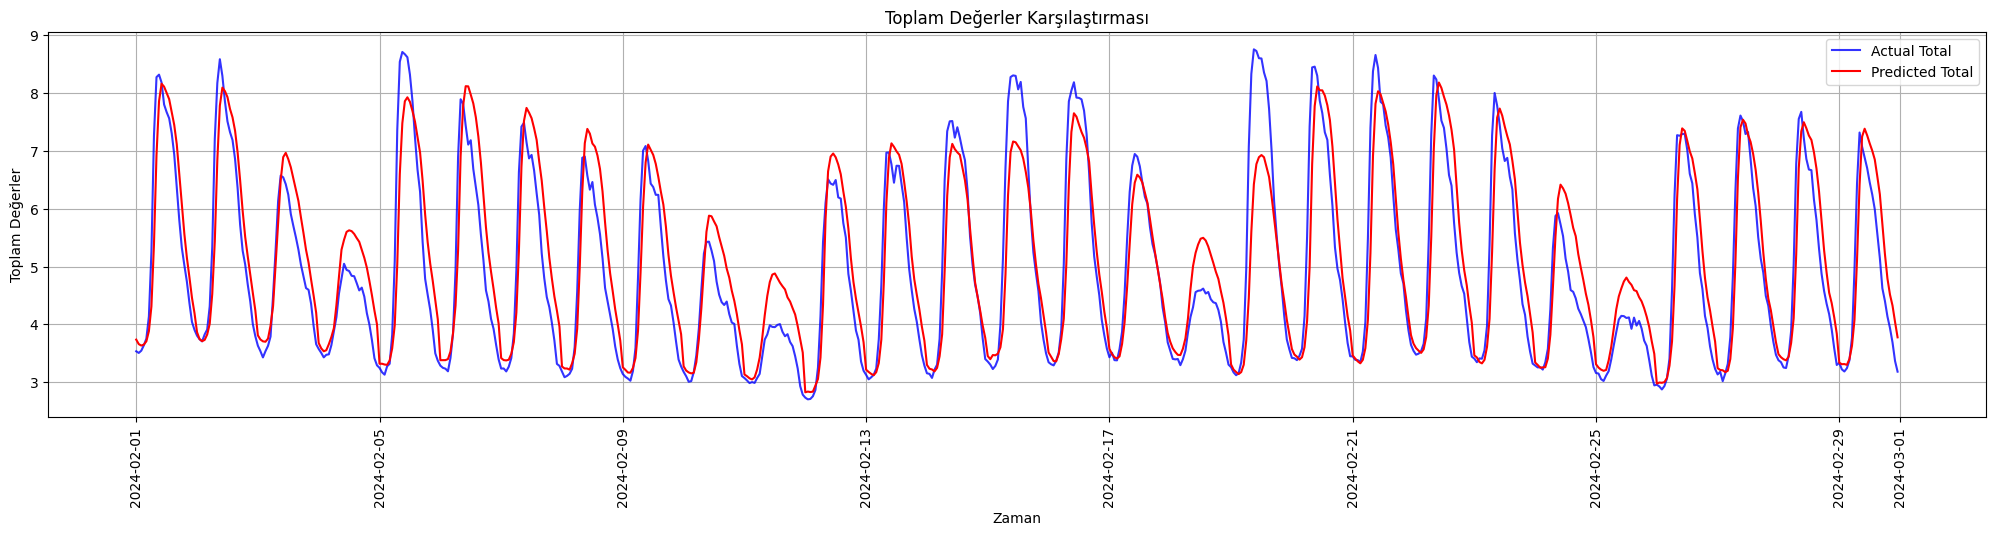

In [54]:
df_justfeb_sum = df_justfeb.sum(axis=1)
all_pred_sum = all_pred.sum(axis=1)


# Ortak indeks kısmını kullanarak grafik oluşturalım
plt.figure(figsize=(25, 5))
plt.plot(df_justfeb_sum.index, df_justfeb_sum.values, label='Actual Total', color='blue', alpha=0.8)  # Gerçek veri toplamları
plt.plot(all_pred_sum.index, all_pred_sum.values, label='Predicted Total', color='red')  # Tahmin edilen veri toplamları

plt.title('Toplam Değerler Karşılaştırması')
plt.xlabel('Zaman')
plt.xticks(rotation=90)
plt.ylabel('Toplam Değerler')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
def create_pivot_table_for_checking_estimated(dataframe):
    pivot_table = dataframe.pivot_table(
        values='IMPORTESTIMATED',  
        index='POINTSERNO',     
        columns='PROFILEDATE',    
        aggfunc='sum',
        fill_value=np.nan           
    )

    rows_to_keep = pivot_table.sum(axis=1) != 0

    # Apply the filter to the pivot_table to drop rows with a sum of 0
    filtered_table = pivot_table[rows_to_keep]
    filtered_table.columns = pd.to_datetime(filtered_table.columns)
    selected_dates = filtered_table.loc[:, '2024-02-01':'2024-02-29']
    selected_dates = selected_dates.dropna(how='any')
    
    if (selected_dates.isna().sum().sum()) == 0:
        print('There is no nan values and we can continue to the next step')
    else:
        print('There are nan values in the dataset, please check the data')
    return(selected_dates)

In [56]:
df_pivoted_for_checking_e = create_pivot_table_for_checking_estimated(tic_ag_e)
df_pivoted_for_checking_e = df_pivoted_for_checking_e.transpose()#.reset_index(drop = True)
math = df_pivoted_for_checking_e[common_columns]


There is no nan values and we can continue to the next step


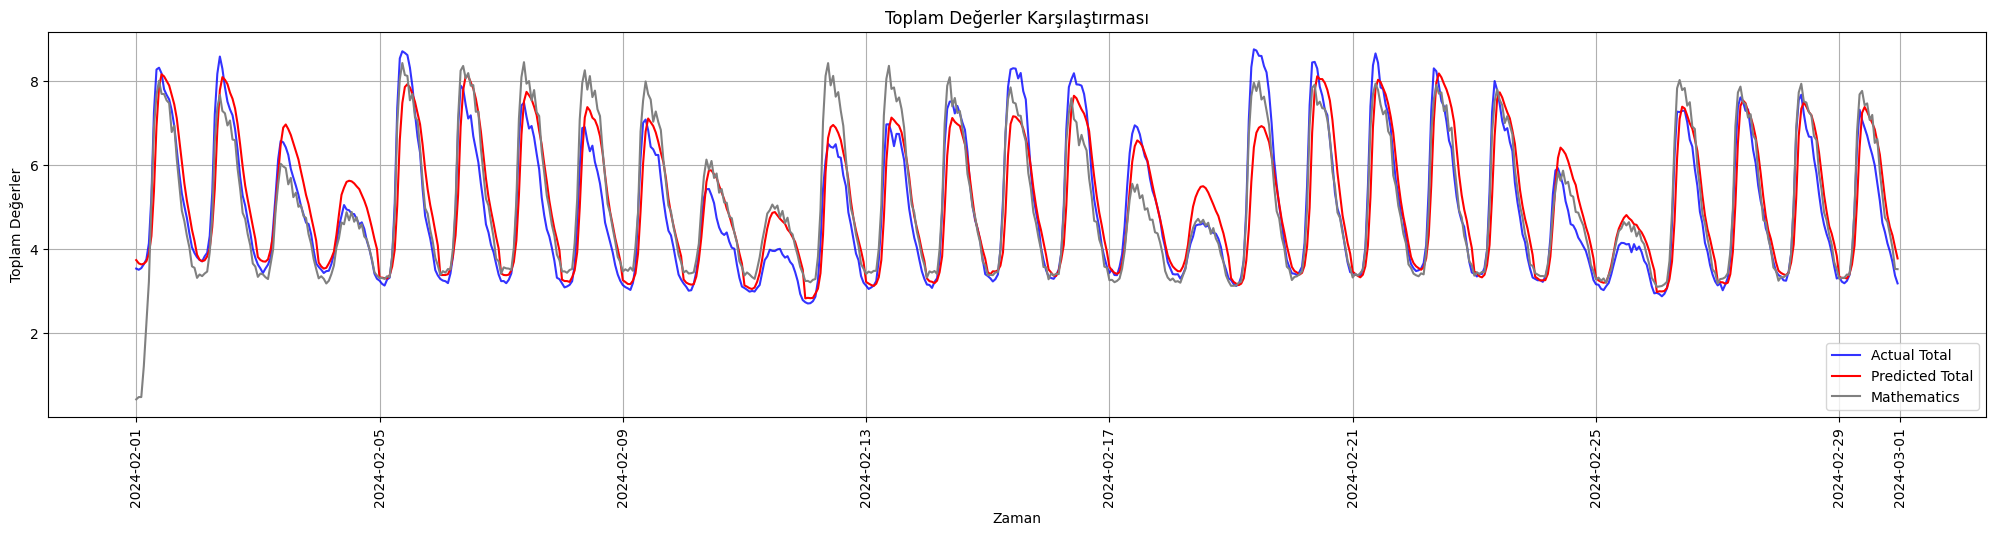

In [57]:
df_justfeb_sum = df_justfeb.sum(axis=1)
all_pred_sum = all_pred.sum(axis=1)
math_sum =math.sum(axis=1)

# Ortak indeks kısmını kullanarak grafik oluşturalım
plt.figure(figsize=(25, 5))
plt.plot(df_justfeb_sum.index, df_justfeb_sum.values, label='Actual Total', color='blue', alpha=0.8)  # Gerçek veri toplamları
plt.plot(all_pred_sum.index, all_pred_sum.values, label='Predicted Total', color='red')  # Tahmin edilen veri toplamları
plt.plot(math_sum.index, math_sum.values, label='Mathematics', color='grey') # matematik yöntem 

plt.title('Toplam Değerler Karşılaştırması')
plt.xlabel('Zaman')
plt.xticks(rotation=90)
plt.ylabel('Toplam Değerler')
plt.legend()
plt.grid(True)
plt.show()

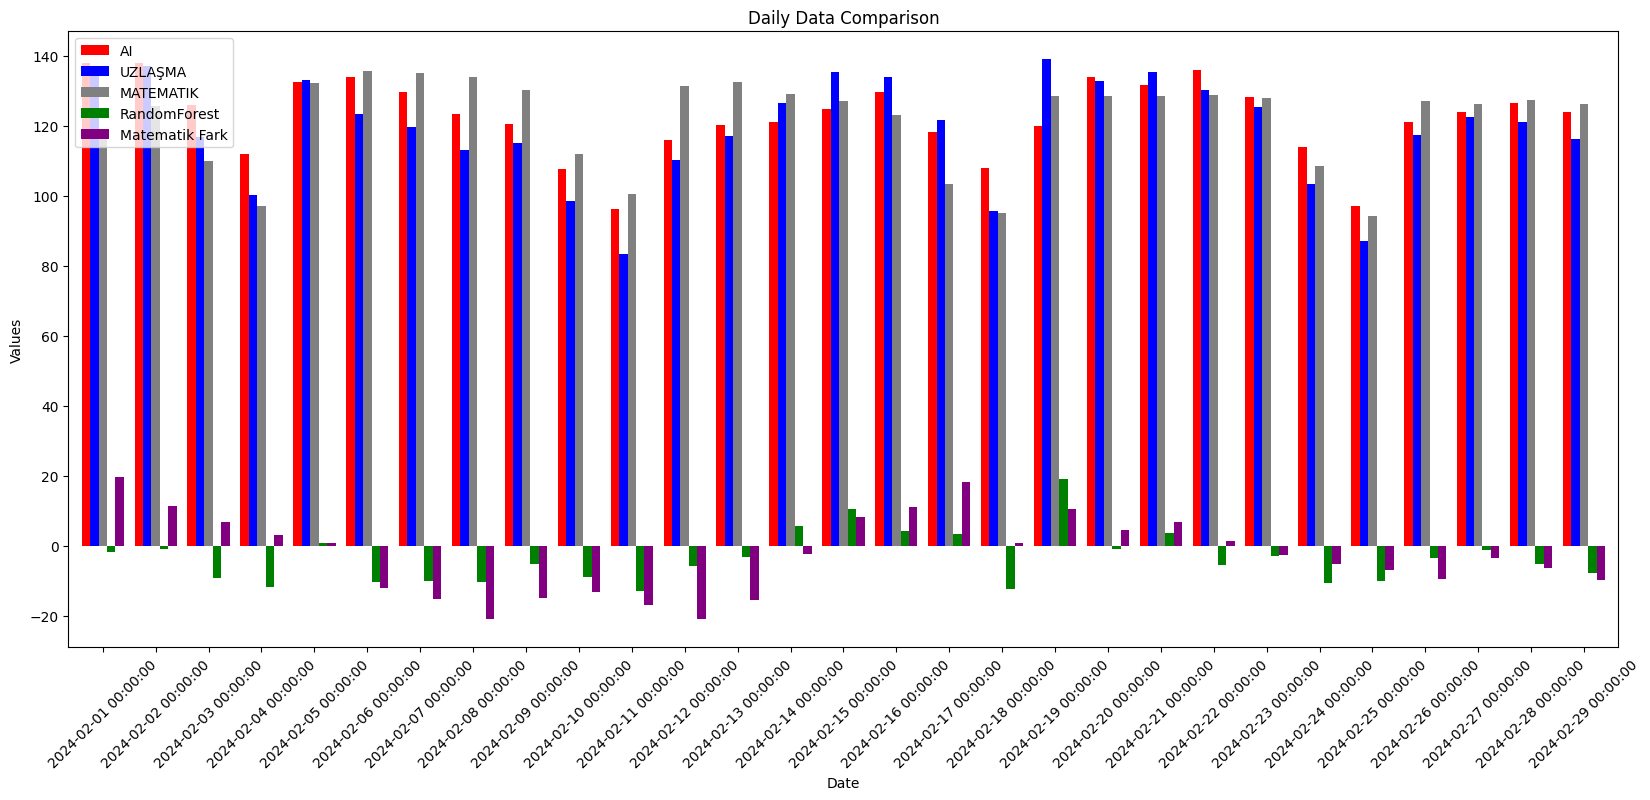

In [58]:
sums_0_24 = all_pred_sum.copy()
sum_1_24 = df_justfeb_sum.copy()
sum_2_24 = math_sum.copy()



sums_0_24.index = pd.to_datetime(sums_0_24.index)#predict
sum_1_24.index = pd.to_datetime(sum_1_24.index)#uzlaşma 
sum_2_24.index = pd.to_datetime(sum_2_24.index)#matematik
 
diff_ac_pc = sum_1_24 - sums_0_24
diff_ac_ec = sum_1_24 - sum_2_24
 
daily_sums_0_24 = sums_0_24.resample('D').sum()
daily_sums_1_24 = sum_1_24.resample('D').sum()
daily_sums_2_24 = sum_2_24.resample('D').sum()
daily_diff_ac_pc = diff_ac_pc.resample('D').sum()
daily_diff_ac_ec = diff_ac_ec.resample('D').sum()
 
data = pd.DataFrame({
    'Model': daily_sums_0_24,
    'Actual': daily_sums_1_24,
    'Mathematics': daily_sums_2_24,
    'Difference ': daily_diff_ac_pc,
    'Math Difference': daily_diff_ac_ec
})
 
colors = ['red', 'blue','grey',  'green', 'purple']  
 
# Plotting
fig, ax = plt.subplots(figsize=(20, 8))
data.plot(kind='bar', ax=ax, width=0.8, color=colors)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Daily Data Comparison')
plt.xticks(rotation=45)
plt.show()